<a href="https://colab.research.google.com/github/Puja-Archana/Happymonk-assignment/blob/main/Bank_Note_Authentication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bank Note Authentication using ANN

---



###### Dataset used is from https://www.kaggle.com/ritesaluja/bank-note-authentication-uci-data

---



**Name:** Puja Archana Sahu

---


**mail:** puja.archana21@gmail.com

### Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
np.random.seed(0)

In [3]:
BankDs = pd.read_csv("/content/BankNoteAuthentication.csv")


In [4]:
BankDs.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
BankDs['class'].unique()

array([0, 1])

#### Checking for null values and other irregularities

In [6]:
BankDs.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [7]:
BankDs.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [8]:
for col in BankDs:
  print(f'{col}:{BankDs[col].unique()}')

variance:[ 3.6216  4.5459  3.866  ... -3.7503 -3.5637 -2.5419]
skewness:[  8.6661    8.1674   -2.6383  ... -13.4586   -8.3827   -0.65804]
curtosis:[-2.8073 -2.4586  1.9242 ... 17.5932 12.393   2.6842]
entropy:[-0.44699 -1.4621   0.10645 ... -1.2953  -0.55949 -2.7771 ]
class:[0 1]


In [9]:
BankDs.shape

(1372, 5)

#### Scaling

In [10]:
cols_to_scale = ['variance','skewness','curtosis','entropy']

from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
BankDs[cols_to_scale] = scalar.fit_transform(BankDs[cols_to_scale])

In [11]:
BankDs.head()

,variance,skewness,curtosis,entropy,class
0,0.769004,0.839643,0.106783,0.736628,0
1,0.835659,0.820982,0.121804,0.644326,0
2,0.786629,0.416648,0.310608,0.786951,0
3,0.757105,0.871699,0.054921,0.450440,0
4,0.531578,0.348662,0.424662,0.687362,0


#### Splitting into training and test set:

In [12]:
x = BankDs.iloc[:,:-1]
y = BankDs.iloc[:, -1]

In [13]:
x.head()

,variance,skewness,curtosis,entropy
0,0.769004,0.839643,0.106783,0.736628
1,0.835659,0.820982,0.121804,0.644326
2,0.786629,0.416648,0.310608,0.786951
3,0.757105,0.871699,0.054921,0.450440
4,0.531578,0.348662,0.424662,0.687362


In [14]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [16]:
x_train.shape

(1097, 4)

In [17]:
y_train.shape

(1097,)

#### Artificial Neural Network model definition

In [18]:
model = keras.Sequential([layers.Dense(units = 8, activation = 'relu'),
                          layers.Dense(units = 32, activation = 'relu'),
                          layers.Dense(units = 1, activation = 'sigmoid')])

#### Compiling the model:

In [19]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
    )

In [20]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100)

Epoch 1/100
35/35 [==============================] - 1s 10ms/step - loss: 0.7038 - accuracy: 0.4594 - val_loss: 0.6887 - val_accuracy: 0.5527
Epoch 2/100
35/35 [==============================] - 0s 4ms/step - loss: 0.6826 - accuracy: 0.5497 - val_loss: 0.6729 - val_accuracy: 0.5709
Epoch 3/100
35/35 [==============================] - 0s 4ms/step - loss: 0.6723 - accuracy: 0.5533 - val_loss: 0.6631 - val_accuracy: 0.5818
Epoch 4/100
35/35 [==============================] - 0s 4ms/step - loss: 0.6635 - accuracy: 0.5688 - val_loss: 0.6512 - val_accuracy: 0.6073
Epoch 5/100
35/35 [==============================] - 0s 5ms/step - loss: 0.6529 - accuracy: 0.6044 - val_loss: 0.6366 - val_accuracy: 0.6509
Epoch 6/100
35/35 [==============================] - 0s 4ms/step - loss: 0.6392 - accuracy: 0.6390 - val_loss: 0.6201 - val_accuracy: 0.6727
Epoch 7/100
35/35 [==============================] - 0s 5ms/step - loss: 0.6234 - accuracy: 0.6755 - val_loss: 0.6013 - val_accuracy: 0.6909
Epoch 8/100


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [22]:
y_pred = model.predict(x_test)

In [23]:
y_pr = []

for i in y_pred:
  if i >= 0.5:
    y_pr.append(1)
  else:
    y_pr.append(0)  

print(y_pr)

[1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1]


In [24]:
y_test

1023    1
642     0
1196    1
31      0
253     0
       ..
1342    1
251     0
1256    1
966     1
1096    1
Name: class, Length: 275, dtype: int64

In [25]:
history_df = pd.DataFrame(history.history)

In [26]:
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.703831,0.459435,0.688672,0.552727
1,0.682619,0.549681,0.672858,0.570909
2,0.672316,0.553327,0.663136,0.581818
3,0.663453,0.568824,0.651194,0.607273
4,0.652931,0.604376,0.636567,0.650909


#### Train vs Test loss for each epoch:

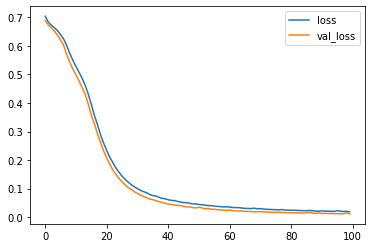

In [27]:
history_df.loc[:, ['loss', 'val_loss']].plot()

#### Train vs Test accuracy for each epoch

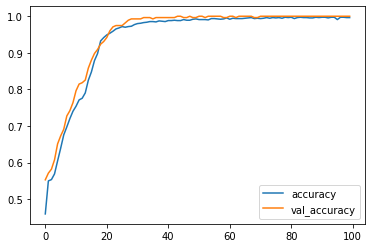

In [28]:
history_df.loc[:,['accuracy', 'val_accuracy']].plot()

#### Loss function plot:

#### Showing final weights and biases

In [29]:
first_layer_weights = model.layers[0].get_weights()[0]
first_layer_biases  = model.layers[0].get_weights()[1]
second_layer_weights = model.layers[1].get_weights()[0]
second_layer_biases  = model.layers[1].get_weights()[1]
third_layer_weights = model.layers[2].get_weights()[0]
third_layer_biases = model.layers[2].get_weights()[1]

In [30]:
first_layer_weights

array([[ 1.3383528 ,  0.33881474, -0.50308   , -0.62894005, -0.72815233,
        -0.1493494 ,  0.82648975, -0.18323195],
       [ 0.8085133 ,  1.0598938 ,  0.19158506, -0.26096922, -0.3517919 ,
        -0.14548267,  1.1412728 ,  0.32624432],
       [ 1.0348297 ,  0.84036845, -0.32294708,  0.35300022,  0.5121269 ,
        -0.9048437 ,  1.2211161 , -1.6454482 ],
       [ 0.4182663 , -0.546744  , -0.24304754, -0.54168475,  0.15560824,
         0.7381594 ,  0.40270826, -0.13225245]], dtype=float32)

In [31]:
second_layer_weights

array([[-0.12020552,  0.6883974 ,  0.2711711 ,  0.28089172, -0.69620097,
        -0.21268953, -0.1625295 , -0.34328294,  0.7256889 , -0.5262525 ,
        -0.38269293, -0.17367946, -0.10957348,  0.66947716, -0.04710722,
         0.00605708, -0.44595775, -0.27174932, -0.25095788, -0.21667796,
        -0.22475748,  0.7331723 , -0.19197205, -0.39935723, -0.07442494,
        -0.25170666, -0.3467359 ,  0.1224074 ,  0.2565506 , -0.34545505,
        -0.07624209, -0.28067154],
       [-1.1277536 ,  0.82734674,  0.01100315, -0.3361853 , -0.9164925 ,
        -0.9753223 , -0.15199934,  0.09677657,  1.482449  , -0.89472663,
        -0.31112856,  0.11964482, -0.32360917,  0.92922866,  0.12687975,
        -0.33123344, -1.1026812 , -0.31131607, -0.279729  , -0.1631635 ,
        -0.09627646,  1.3458846 , -0.6338842 ,  0.15322386,  0.16067566,
        -0.16641596, -0.09732848,  0.14912347,  0.07634175,  0.2384702 ,
        -0.12544158, -1.2093492 ],
       [ 0.04811588, -0.00683697, -0.1352891 , -0.2249

In [32]:
third_layer_weights 

array([[ 2.0175393 ],
       [-1.515572  ],
       [ 0.00544871],
       [-0.39993402],
       [ 1.5640455 ],
       [ 0.74719656],
       [-0.16427556],
       [-0.19776855],
       [-0.90333664],
       [ 1.1913414 ],
       [-0.21365982],
       [ 0.3124197 ],
       [-0.15402052],
       [-1.0456022 ],
       [-0.21838862],
       [-0.12953591],
       [ 1.9865179 ],
       [-0.27231544],
       [ 0.2721334 ],
       [-0.3157095 ],
       [ 0.2776562 ],
       [-1.2475085 ],
       [ 1.7274141 ],
       [-0.06382418],
       [-0.08160961],
       [-0.25053844],
       [-0.04325393],
       [-0.14655672],
       [-0.05421352],
       [-0.30749387],
       [-0.17726299],
       [ 1.8954746 ]], dtype=float32)

In [33]:
print(third_layer_biases)

[0.14525947]


#### F1 score and heatmaps showing confustion matrix

In [34]:
import sklearn
sklearn.metrics.f1_score(y_test, y_pr)

1.0

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
cf_matrix = confusion_matrix(y_test, y_pr)
print(cf_matrix)

[[157   0]
 [  0 118]]


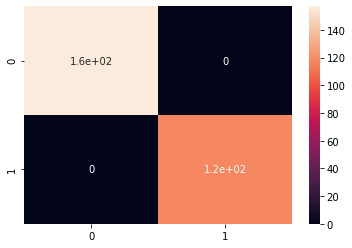

In [37]:
sns.heatmap(cf_matrix, annot=True)

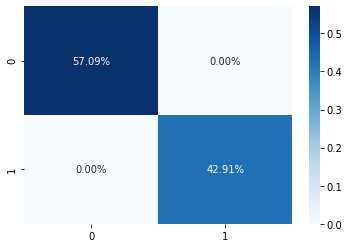

In [38]:
sns.heatmap(cf_matrix/np.sum(cf_matrix),
            annot=True,
            fmt='.2%',
            cmap='Blues')